# Plots of Watershed Algorithm on Comet Using RADICAL-Pilot

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint

blues   = cm.get_cmap(plt.get_cmap('Blues'))
greens  = cm.get_cmap(plt.get_cmap('Greens'))
reds    = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys   = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

def merge_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

Calculate the mean and standard deviation of Pilot execution times

In [2]:
%ls data_blobdetector_rp

blobdetector_rp_strong_10to14.csv  blobdetector_rp_weak_10to14.csv
blobdetector_rp_strong_40to44.csv  blobdetector_rp_weak_40to44.csv


In [3]:
folder      = 'data_blobdetector_rp'
weak_data   = 'blobdetector_rp_weak_40to44.csv'
strong_data = 'blobdetector_rp_strong_40to44.csv'

columns=['nodes', 'duration_TTC', 'duration_Units']

raw_weakdf   = pd.read_csv(os.path.join(folder, weak_data))
raw_strongdf = pd.read_csv(os.path.join(folder, strong_data))

weak_mean    = raw_weakdf[columns].groupby('nodes').mean()
weak_error   = raw_weakdf[columns].groupby('nodes').std()
strong_mean  = raw_strongdf[columns].groupby('nodes').mean()
strong_error = raw_strongdf[columns].groupby('nodes').std()

weak_diff    = weak_mean.copy()
weak_diff['duration_diff'] = weak_diff['duration_TTC'] - weak_diff['duration_Units']
weak_diff    = weak_diff.drop(columns=['duration_TTC', 'duration_Units'])
strong_diff    = strong_mean.copy()
strong_diff['duration_diff'] = strong_diff['duration_TTC'] - strong_diff['duration_Units']
strong_diff    = strong_diff.drop(columns=['duration_TTC', 'duration_Units'])


Plot mean Pilot and Unit execution times

In [4]:
raw_strongdf

,Unnamed: 0,nodes,framework,duration_TTC,duration_Units,session,json
0,0,1,RADICAL-Pilot,3842.7602,3667.194238,NaN,rp_blobDetector_192tasks_24cores_43/rp_blobDet...
1,1,1,RADICAL-Pilot,3808.3753,3634.727138,NaN,rp_blobDetector_192tasks_24cores_41/rp_blobDet...
2,2,1,RADICAL-Pilot,3927.1719,3758.750208,NaN,rp_blobDetector_192tasks_24cores_42/rp_blobDet...
3,3,1,RADICAL-Pilot,4266.9894,3685.817221,NaN,rp_blobDetector_192tasks_24cores_40/rp_blobDet...
4,4,1,RADICAL-Pilot,4247.0025,3975.544767,NaN,rp_blobDetector_192tasks_24cores_44/rp_blobDet...
5,5,2,RADICAL-Pilot,2047.7931,1842.955410,NaN,rp_blobDetector_192tasks_48cores_43/rp_blobDet...
6,6,2,RADICAL-Pilot,2050.1628,1858.179540,NaN,rp_blobDetector_192tasks_48cores_44/rp_blobDet...
7,7,2,RADICAL-Pilot,1993.6205,1805.784667,NaN,rp_blobDetector_192tasks_48cores_41/rp_blobDet...
8,8,2,RADICAL-Pilot,2047.4215,1864.624125,NaN,rp_blobDetector_192tasks_48cores_42/rp_blobDet...
9,9,2,RADICAL-Pilot,1978.2377,1805.998406,NaN,rp_blobDetector_192tasks_48cores_40/rp_blobDet...


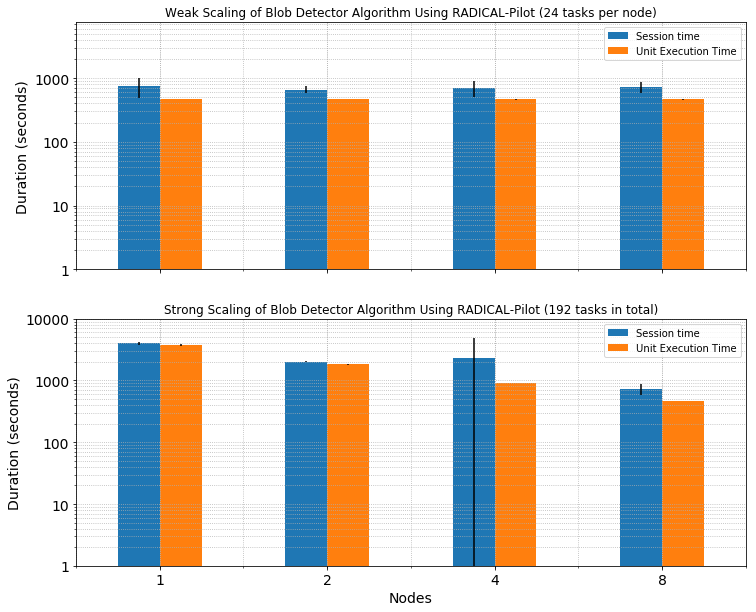

In [5]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

shared_kwargs = {'kind'     : 'bar',
                 'log'      : True,
                 'fontsize' : 14
                }

weak_title    = {'title'    : 'Weak Scaling of Blob Detector Algorithm Using RADICAL-Pilot (24 tasks per node)',
                 'ax'       : axes[0],
                 'yerr'     : weak_error
                  }
strong_title  = {'title'    : 'Strong Scaling of Blob Detector Algorithm Using RADICAL-Pilot (192 tasks in total)',
                 'ax'       : axes[1],
                 'yerr'     : strong_error
                }

weak_kwargs     = merge_dicts(shared_kwargs, weak_title)
weak_scale_plot = weak_mean.plot(**weak_kwargs)
weak_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
weak_scale_plot.set_yticks([1, 10, 100, 1000, 10000])
weak_scale_plot.set_yticklabels(['1','10','100','1000', '10000'], fontsize=14)
weak_scale_plot.grid('on', which='both', linestyle=':')
axes[0].legend(['Session time', 'Unit Execution Time'])

strong_kwargs     = merge_dicts(shared_kwargs, strong_title)
strong_scale_plot = strong_mean.plot(**strong_kwargs)
strong_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
strong_scale_plot.set_yticks([1, 10, 100, 1000, 10000])
strong_scale_plot.set_yticklabels(['1','10','100','1000', '10000'], fontsize=14)
strong_scale_plot.set_xticklabels(['1','2','4','8'], rotation=0, fontsize=14)
strong_scale_plot.grid('on', which='both', linestyle=':')
strong_scale_plot.set_xlabel('Nodes', fontsize=14)
axes[1].legend(['Session time', 'Unit Execution Time'])

Plot difference between Pilot and Unit execution times

Text(0.5,0,'Nodes')

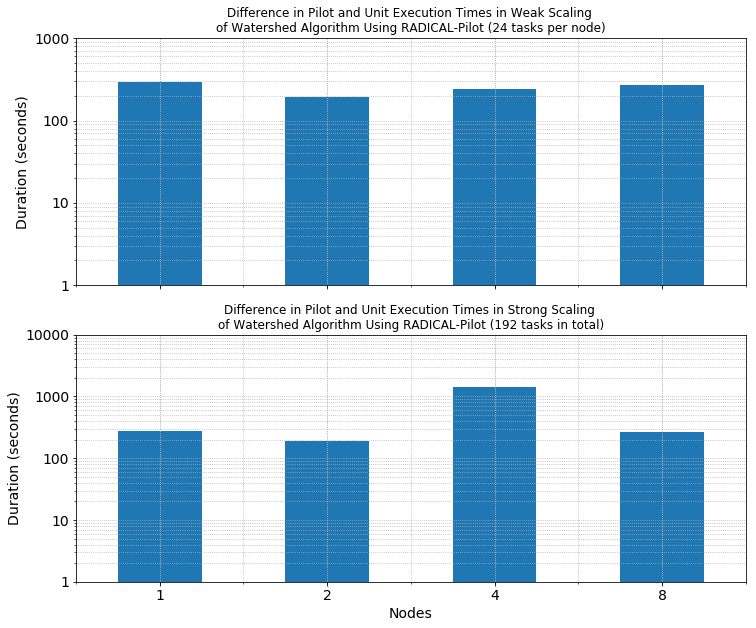

In [6]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

shared_kwargs = {'kind'     : 'bar',
                 'legend'   : False,
                 'log'      : True,
                 'fontsize' : 14
                }

weak_title    = {'title'    : 'Difference in Pilot and Unit Execution Times in Weak Scaling \nof Watershed Algorithm Using RADICAL-Pilot (24 tasks per node)',
                 'ax'       : axes[0],
                  }
strong_title  = {'title'    : 'Difference in Pilot and Unit Execution Times in Strong Scaling \nof Watershed Algorithm Using RADICAL-Pilot (192 tasks in total)',
                 'ax'       : axes[1],
                }

weak_kwargs     = merge_dicts(shared_kwargs, weak_title)
weak_scale_plot = weak_diff.plot(**weak_kwargs)
weak_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
weak_scale_plot.set_yticks([1, 10, 100, 1000, 10000])
weak_scale_plot.set_yticklabels(['1','10','100','1000', '10000'], fontsize=14)
weak_scale_plot.set_ylim([0, 1000])
weak_scale_plot.grid('on', which='both', linestyle=':')

strong_kwargs     = merge_dicts(shared_kwargs, strong_title)
strong_scale_plot = strong_diff.plot(**strong_kwargs)
strong_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
strong_scale_plot.set_yticks([1, 10, 100, 1000, 10000])
strong_scale_plot.set_yticklabels(['1','10','100','1000', '10000'], fontsize=14)
strong_scale_plot.set_xticklabels(['1','2','4','8'], rotation=0, fontsize=14)
strong_scale_plot.grid('on', which='both', linestyle=':')
strong_scale_plot.set_xlabel('Nodes', fontsize=14)

In [7]:
weak_mean

,duration_TTC,duration_Units
nodes,,
1,755.78260,466.324141
2,660.37628,465.866054
4,700.33960,461.342004
8,730.14906,460.557322


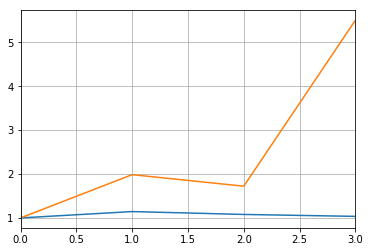

In [8]:
speedups = list()
for i in range(len(weak_mean['duration_TTC'])):
    speedup = weak_mean['duration_TTC'].iloc[0] / weak_mean['duration_TTC'].iloc[i]
    speedups.append(speedup)

plt.grid()
plt.plot(speedups, scalex=False)


speedups = list()
for i in range(len(strong_mean['duration_TTC'])):
    speedup = strong_mean['duration_TTC'].iloc[0] / strong_mean['duration_TTC'].iloc[i]
    speedups.append(speedup)

plt.xlim(0,3)
plt.plot(speedups, scalex=False)



